# Covid 19 - TIA Zonas Básicas de Salud Alcobendas

Este notebook tiene como objetivo la creación de una historia a partir del análisis y visualización de un conjunto de datos. El seleccionado ofrece información epidemiológica del Covid - 19: los **casos confirmados y tasas de incidencia acumulada (TIA) para población de 60 y más años de edad del municipio de Alcobendas**. Para ello, nos serviremos de un **Informe semanal en formato CSV** con datos para la población de 60 y más años de edad de casos confirmados y tasas de incidencia acumulada de los **últimos 14 días y desde el inicio de la pandemia** hasta el 29 de marzo. La fuente de los datos es *Red de Vigilancia Epidemiológica de la Comunidad de Madrid*. 

**NOTA**: el archivo recoge los datos pertinentes hasta su fecha de publicación, a saber, el **29 de marzo de 2022**. Todas las categorías de datos son correspondientes hasta esa fecha, por ejemplo *incidencia acumulada en los últimos 14 días* y similares. Es necesairo tener esto en cuenta a la hora de leer e interpretar los datos ya que no siempre que se haga referencia a la temporalidad podrá ser esto indicado, por lo que téngase en cuenta implícitamente en el resto del documento desde este párrafo.

## Preparación de librería

En primer lugar, necesitamos instalar la librería **Pandas**, una biblioteca de software escrita como extensión de NumPy para **manipulación y análisis de datos para el lenguaje de programación Python**. Sus estructuras de datos y operaciones nos permitirán manipular tablas numéricas y series temporales, interesante para trabajar con nuestro conjunto de datos (CSV). Para ello `!pip install ()`:

In [6]:
!pip install pandas

En segundo lugar, una vez instalada, procedemos a configurarla. La hemos instalado, pero necesitamos importarla para trabajar con su lenguaje en este documento. Lo hacemos con la abreviación `pd` de la siguiente manera:

In [7]:
import pandas as pd

## Definición de  variable 

Una vez tenemos preparada la librería, en tercer lugar, debemos decirle a Python cuáles son los datos con los que vamos a trabajar. En este caso se trata de un archivo **CSV**. El nombre que daremos a esta variable será `url` puesto que es el link del archivo CSV, extraído de los conjuntos de datos abiertos facilitados por el gobierno. Lo hacemos con el signo `=` para generar la variable y las `""` para indicar que se trata de un link.

In [8]:
url = "https://datos.alcobendas.org/dataset/e841a91e-a7d8-4bd8-977c-f842169cd04e/resource/be4732de-a69a-48c2-849a-be8130a9f64f/download/recurso.csv"

## Creación de dataframe 

En cuarto lugar, una vez tenemos preparadas la librería y la variable con las que vamos a trabajar necesitamos traer los datos al presente cuaderno para proceder a su análisis y manipulación de presentación. Lo hacemos creando una tabla, denominada *dataframe*, que nos mostrará los datos en bruto en forma de tabla con los que vamos a trabajar.

Para ello necesitamos que Pandas lea los datos de la variable definida. Utilizamos la siguiente función que nos ofrece la librería: `pd.read_csv`(archivo). Creamos una variable denominada Dataframe *(df)* con los datos del archivo CSV contenidos en la varible *url*, leídos a través de la función recién mencionada para poder referirnos a ella en el resto del documento. El resultado de esta sintaxis es el siguiente:

In [9]:
df = pd.read_csv(url)
df

,Zona básica de salud,fecha informe,Casos confirmados en los ultimos 14 días,Tasa de incidencia acumulada en los últimos 14 días,Tasa incidencia acumulada activos ultimos 14dias,Casos confirmados totales,Tasa de incidencia acumulada total,Casos confirmados activos ultimos 14dias,Código geometría,Unnamed: 9
0,Alcobendas - Chopera,2022/03/29 11:51:00,50.0,177.59,NaN,7715.0,27401.88,NaN,8,NaN
1,La Moraleja,2022/03/29 11:51:00,66.0,275.59,NaN,5911.0,24681.62,NaN,125,NaN
2,Marqués de la Valdavia,2022/03/29 11:51:00,55.0,309.53,NaN,4181.0,23529.74,NaN,160,NaN
3,Miraflores,2022/03/29 11:51:00,41.0,185.49,NaN,5940.0,26872.96,NaN,172,NaN
4,Valdelasfuentes,2022/03/29 11:51:00,65.0,245.84,NaN,5948.0,22496.22,NaN,262,NaN
...,...,...,...,...,...,...,...,...,...,...
1085,Alcobendas - Chopera,2020/02/26 07:00:00,NaN,0.00,NaN,NaN,0.00,NaN,8,NaN
1086,La Moraleja,2020/02/26 07:00:00,NaN,0.00,NaN,NaN,0.00,NaN,125,NaN
1087,Marqués de la Valdavia,2020/02/26 07:00:00,NaN,0.00,NaN,NaN,0.00,NaN,160,NaN
1088,Miraflores,2020/02/26 07:00:00,NaN,0.00,NaN,NaN,0.00,NaN,172,NaN


Este dataframe supone un primer acercamiento a los datos pero es insuficiente para su comprensión. Apreciamos que contiene **1090 filas**, a saber, zonas básicas de salud del Ayuntamiento de Alcobendas, de las que nos muestra las 5 primeras y las 5 últimas. De cada una de ellas nos presenta en las **10 columnas** una serie de datos. De su visualización podemos decidir qué categorías nos resultan pertinentes para nuestra historia: **casos confirmados**, **tasa de incidencia acumulada en los últimos 14 días**, los **casos confirmados totales** y la **tasa de incidencia acumulada total** de las personas de 60 años de edad en adelante desde el inicio de la pandemia hasta el 29 de marzo de este año. 

## Exploración del dataframe

Al Dataframe (*df*) le ponemos el `.` para aplicarle una función. Comenzamos por lo elemental. La función `.info` nos explica qué hay en el dataframe *(df)* por categorías.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 10 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   Zona básica de salud                                 1090 non-null   object 
 1   fecha informe                                        1090 non-null   object 
 2   Casos confirmados en los ultimos 14 días             766 non-null    float64
 3   Tasa de incidencia acumulada en los últimos 14 días  1090 non-null   float64
 4   Tasa incidencia acumulada activos ultimos 14dias     70 non-null     float64
 5   Casos confirmados totales                            1005 non-null   float64
 6   Tasa de incidencia acumulada total                   1090 non-null   float64
 7   Casos confirmados activos ultimos 14dias             47 non-null     float64
 8   Código geometría                                     1090 non-null  

Si queremos conocer de manera exclusiva las columnas que tiene nuestra tabla ponemos `df.columns`.

In [14]:
df.columns

Index(['Zona básica de salud', 'fecha informe',
       'Casos confirmados en los ultimos 14 días',
       'Tasa de incidencia acumulada en los últimos 14 días',
       'Tasa incidencia acumulada activos ultimos 14dias',
       'Casos confirmados totales', 'Tasa de incidencia acumulada total',
       'Casos confirmados activos ultimos 14dias', 'Código geometría',
       'Unnamed: 9'],
      dtype='object')

Al visualizar el contenido de esta manera resulta más fácil la selección anteriormente realizada de las categorías que nos interesan.

Si queremos centrarnos en los valores numéricos utilizamos la función `.describe()`, que nos ofrece el recuento de los datos que queramos, la media, la mínima la desviación típica...etc.

In [15]:
df.describe()

,Casos confirmados en los ultimos 14 días,Tasa de incidencia acumulada en los últimos 14 días,Tasa incidencia acumulada activos ultimos 14dias,Casos confirmados totales,Tasa de incidencia acumulada total,Casos confirmados activos ultimos 14dias,Código geometría,Unnamed: 9
count,766.000000,1090.000000,70.000000,1005.000000,1090.000000,47.000000,1090.000000,0.0
mean,78.788512,236.630182,61.387857,1318.079602,5126.218176,20.851064,145.400000,NaN
std,114.282643,424.133672,66.150610,1745.291517,7034.369654,16.318806,82.270588,NaN
min,5.000000,0.000000,0.000000,6.000000,0.000000,5.000000,8.000000,NaN
25%,20.000000,16.835000,15.210000,120.000000,518.865000,9.000000,125.000000,NaN
50%,41.000000,92.530000,37.940000,182.000000,727.725000,16.000000,160.000000,NaN
75%,80.750000,244.277500,89.792500,2392.000000,10074.802500,27.500000,172.000000,NaN
max,931.000000,3583.060000,292.970000,7715.000000,27401.880000,78.000000,262.000000,NaN


Así, podemos saber que en el municipio de Alcobendas hubo **766 casos** de Covid-19 confirmados de personas iguales o mayores de 60 años en los últimos 14 días de marzo y un total de **1.005.000** desde el inicio de la pandemia.

**NOTA**: es necesario puntualizar que, dado que los datos son acumulados, el recuento de los mismos no es fidedigno. Como se mostrará posteriormente al sumar individualmente las etiquetas que seleccionemos, el total de contagios en los dos años en Alcobendas para las personas iguales o mayores de 60 años es de **29.695** y en los últimos 14 días de **277 casos**.

Para conocer las primeras zonas sanitariarias de Alcobendas que presenta la tabla, utilizamos la función `.head`. Para conocer las últimas, nos servimos de la función `.tail`. A continuación especificamos entreparéntesis *()* el número de zonas que queremos visualizar. En este caso indicamos 10 para tener más información que la que mostraba la visualización del dataframe y tener una mayor amplitud de visión sobre los datos.

In [16]:
df.head (10)

,Zona básica de salud,fecha informe,Casos confirmados en los ultimos 14 días,Tasa de incidencia acumulada en los últimos 14 días,Tasa incidencia acumulada activos ultimos 14dias,Casos confirmados totales,Tasa de incidencia acumulada total,Casos confirmados activos ultimos 14dias,Código geometría,Unnamed: 9
0,Alcobendas - Chopera,2022/03/29 11:51:00,50.0,177.59,NaN,7715.0,27401.88,NaN,8,NaN
1,La Moraleja,2022/03/29 11:51:00,66.0,275.59,NaN,5911.0,24681.62,NaN,125,NaN
2,Marqués de la Valdavia,2022/03/29 11:51:00,55.0,309.53,NaN,4181.0,23529.74,NaN,160,NaN
3,Miraflores,2022/03/29 11:51:00,41.0,185.49,NaN,5940.0,26872.96,NaN,172,NaN
4,Valdelasfuentes,2022/03/29 11:51:00,65.0,245.84,NaN,5948.0,22496.22,NaN,262,NaN
5,Alcobendas - Chopera,2022/03/22 10:36:00,41.0,145.62,NaN,7685.0,27295.33,NaN,8,NaN
6,La Moraleja,2022/03/22 10:36:00,57.0,238.01,NaN,5870.0,24510.42,NaN,125,NaN
7,Marqués de la Valdavia,2022/03/22 10:36:00,37.0,208.23,NaN,4146.0,23332.77,NaN,160,NaN
8,Miraflores,2022/03/22 10:36:00,37.0,167.39,NaN,5918.0,26773.43,NaN,172,NaN
9,Valdelasfuentes,2022/03/22 10:36:00,68.0,257.19,NaN,5916.0,22375.19,NaN,262,NaN


In [17]:
df.tail (10)

,Zona básica de salud,fecha informe,Casos confirmados en los ultimos 14 días,Tasa de incidencia acumulada en los últimos 14 días,Tasa incidencia acumulada activos ultimos 14dias,Casos confirmados totales,Tasa de incidencia acumulada total,Casos confirmados activos ultimos 14dias,Código geometría,Unnamed: 9
1080,Alcobendas - Chopera,2020/02/27 07:00:00,NaN,0.0,NaN,NaN,0.0,NaN,8,NaN
1081,La Moraleja,2020/02/27 07:00:00,NaN,0.0,NaN,NaN,0.0,NaN,125,NaN
1082,Marqués de la Valdavia,2020/02/27 07:00:00,NaN,0.0,NaN,NaN,0.0,NaN,160,NaN
1083,Miraflores,2020/02/27 07:00:00,NaN,0.0,NaN,NaN,0.0,NaN,172,NaN
1084,Valdelasfuentes,2020/02/27 07:00:00,NaN,0.0,NaN,NaN,0.0,NaN,262,NaN
1085,Alcobendas - Chopera,2020/02/26 07:00:00,NaN,0.0,NaN,NaN,0.0,NaN,8,NaN
1086,La Moraleja,2020/02/26 07:00:00,NaN,0.0,NaN,NaN,0.0,NaN,125,NaN
1087,Marqués de la Valdavia,2020/02/26 07:00:00,NaN,0.0,NaN,NaN,0.0,NaN,160,NaN
1088,Miraflores,2020/02/26 07:00:00,NaN,0.0,NaN,NaN,0.0,NaN,172,NaN
1089,Valdelasfuentes,2020/02/26 07:00:00,NaN,0.0,NaN,NaN,0.0,NaN,262,NaN


Para poder preguntar a Python por alguna zona sanitara en concreto primero necesito poder conocerlas todas. Para ello es interesante esta función porque permite introducir intervalos, como se muestra a continuación.

In [18]:
df.head(0-545)

,Zona básica de salud,fecha informe,Casos confirmados en los ultimos 14 días,Tasa de incidencia acumulada en los últimos 14 días,Tasa incidencia acumulada activos ultimos 14dias,Casos confirmados totales,Tasa de incidencia acumulada total,Casos confirmados activos ultimos 14dias,Código geometría,Unnamed: 9
0,Alcobendas - Chopera,2022/03/29 11:51:00,50.0,177.59,NaN,7715.0,27401.88,NaN,8,NaN
1,La Moraleja,2022/03/29 11:51:00,66.0,275.59,NaN,5911.0,24681.62,NaN,125,NaN
2,Marqués de la Valdavia,2022/03/29 11:51:00,55.0,309.53,NaN,4181.0,23529.74,NaN,160,NaN
3,Miraflores,2022/03/29 11:51:00,41.0,185.49,NaN,5940.0,26872.96,NaN,172,NaN
4,Valdelasfuentes,2022/03/29 11:51:00,65.0,245.84,NaN,5948.0,22496.22,NaN,262,NaN
...,...,...,...,...,...,...,...,...,...,...
540,Alcobendas - Chopera,2020/06/14 07:00:00,NaN,7.26,NaN,178.0,645.79,NaN,8,NaN
541,La Moraleja,2020/06/14 07:00:00,NaN,12.62,NaN,174.0,731.80,NaN,125,NaN
542,Marqués de la Valdavia,2020/06/14 07:00:00,NaN,0.00,NaN,107.0,609.24,NaN,160,NaN
543,Miraflores,2020/06/14 07:00:00,NaN,0.00,NaN,159.0,727.86,NaN,172,NaN


In [19]:
df.tail(546-1090)

,Zona básica de salud,fecha informe,Casos confirmados en los ultimos 14 días,Tasa de incidencia acumulada en los últimos 14 días,Tasa incidencia acumulada activos ultimos 14dias,Casos confirmados totales,Tasa de incidencia acumulada total,Casos confirmados activos ultimos 14dias,Código geometría,Unnamed: 9
544,Valdelasfuentes,2020/06/14 07:00:00,8.0,30.43,NaN,227.0,863.38,NaN,262,NaN
545,Alcobendas - Chopera,2020/06/13 07:00:00,NaN,10.88,NaN,178.0,645.79,NaN,8,NaN
546,La Moraleja,2020/06/13 07:00:00,NaN,12.62,NaN,174.0,731.80,NaN,125,NaN
547,Marqués de la Valdavia,2020/06/13 07:00:00,NaN,0.00,NaN,107.0,609.24,NaN,160,NaN
548,Miraflores,2020/06/13 07:00:00,NaN,0.00,NaN,159.0,727.86,NaN,172,NaN
...,...,...,...,...,...,...,...,...,...,...
1085,Alcobendas - Chopera,2020/02/26 07:00:00,NaN,0.00,NaN,NaN,0.00,NaN,8,NaN
1086,La Moraleja,2020/02/26 07:00:00,NaN,0.00,NaN,NaN,0.00,NaN,125,NaN
1087,Marqués de la Valdavia,2020/02/26 07:00:00,NaN,0.00,NaN,NaN,0.00,NaN,160,NaN
1088,Miraflores,2020/02/26 07:00:00,NaN,0.00,NaN,NaN,0.00,NaN,172,NaN


A continuación resulta de interés centrarnos en una categoría para ver los demás datos a partir de ella. Para lo cual necesimaos establecerla como íncide. Lo hacemos así: `set_index('columna que queramos')`.

In [20]:
df.set_index('Casos confirmados en los ultimos 14 días')

,Zona básica de salud,fecha informe,Tasa de incidencia acumulada en los últimos 14 días,Tasa incidencia acumulada activos ultimos 14dias,Casos confirmados totales,Tasa de incidencia acumulada total,Casos confirmados activos ultimos 14dias,Código geometría,Unnamed: 9
Casos confirmados en los ultimos 14 días,,,,,,,,,
50.0,Alcobendas - Chopera,2022/03/29 11:51:00,177.59,NaN,7715.0,27401.88,NaN,8,NaN
66.0,La Moraleja,2022/03/29 11:51:00,275.59,NaN,5911.0,24681.62,NaN,125,NaN
55.0,Marqués de la Valdavia,2022/03/29 11:51:00,309.53,NaN,4181.0,23529.74,NaN,160,NaN
41.0,Miraflores,2022/03/29 11:51:00,185.49,NaN,5940.0,26872.96,NaN,172,NaN
65.0,Valdelasfuentes,2022/03/29 11:51:00,245.84,NaN,5948.0,22496.22,NaN,262,NaN
...,...,...,...,...,...,...,...,...,...
NaN,Alcobendas - Chopera,2020/02/26 07:00:00,0.00,NaN,NaN,0.00,NaN,8,NaN
NaN,La Moraleja,2020/02/26 07:00:00,0.00,NaN,NaN,0.00,NaN,125,NaN
NaN,Marqués de la Valdavia,2020/02/26 07:00:00,0.00,NaN,NaN,0.00,NaN,160,NaN


Para visualizar el conjunto de datos de esta categoría de manera exclusiva y sin reiteraciones utilizamos la función `.unique()` tras especificar entre corchetes y comillas simples `['']` tras `df` el nombre de la columna que queremos. Así:

In [21]:
df['Casos confirmados en los ultimos 14 días'].unique()

array([ 50.,  66.,  55.,  41.,  65.,  57.,  37.,  68.,  48.,  42.,  81.,
        47.,  67.,  36.,  43.,  79.,  84.,  75.,  38.,  70.,  90., 116.,
       154.,  80., 113., 168., 182., 221., 137., 139., 224., 279., 223.,
       188., 186., 260., 363., 246., 205., 287., 371., 567., 314., 265.,
       449., 492., 802., 362., 419., 679., 532., 931., 403., 514., 792.,
       598., 825., 534., 505., 635., 762., 432., 515., 357., 576., 141.,
       219., 138., 110., 217.,  72.,  53.,  30.,  32.,  34.,  33.,  46.,
        27.,  19.,  24.,  29.,  22.,  14.,  25.,  17.,  10.,  15.,  11.,
         9.,   5.,  13.,   8.,   7.,  nan,   6.,  20.,  16.,  21.,  18.,
        49.,  26.,  76.,  51., 100.,  97.,  54., 145.,  60.,  61., 126.,
        78., 208., 106.,  91., 169., 262., 107., 220., 187., 238., 258.,
       101., 189., 194., 135., 213.,  58., 103., 124.,  56.,  94.,  35.,
        59.,  31.,  45.,  52.,  44.,  64.,  74., 129., 111.,  86., 117.,
        77.,  89.,  88.,  73., 125., 120.,  96.,  9

Para el caso que nos ocupa esta función resulta especialmente útil para conocer el listado completo de zonas sanitarias para poder identificar cada una de ellas con una fila y número de la tabla y ampliar las posibilidades de manejar y extraer los datos.

In [22]:
df['Zona básica de salud']

0         Alcobendas - Chopera
1                  La Moraleja
2       Marqués de la Valdavia
3                   Miraflores
4              Valdelasfuentes
                 ...          
1085      Alcobendas - Chopera
1086               La Moraleja
1087    Marqués de la Valdavia
1088                Miraflores
1089           Valdelasfuentes
Name: Zona básica de salud, Length: 1090, dtype: object

In [23]:
df['Zona básica de salud'].unique()

array(['Alcobendas - Chopera', 'La Moraleja', 'Marqués de la Valdavia',
       'Miraflores', 'Valdelasfuentes'], dtype=object)

Vemos así que solo hay 5 zonas sanitarias. Aunque para el caso no es muy relevante, podemos conocer el dato para una categoría de una zona sanitaria concreta de la siguiente manera:`['nombredelacolumna'] [númerodelafila]`. Nos proponemos conocer el número de casos totales confirmados en la zona sanitaria que ocupe la posición de la mitad en la tabla. 

In [24]:
df['Casos confirmados totales'] [545]

178.0

In [25]:
df['Zona básica de salud'] [545]

'Alcobendas - Chopera'

Sabríamos así que la zona sanitaria ***Chopera*** de Alcobendas ha tenido **178 casos** de Covid-19 confirmados en la segunda quincena de marzo, además de que esta zona ocupa entre otras la fila número 545 de la tabla. De esta forma, con las funciones presentadas podemos ir extrayendo del dataframe los datos que queramos.

## Selección de columnas y representación gráfica

A continuación resulta interesante combinar las columnas en las que nos fijamos en un principio para profundizar en estos datos y poder alterar su visualización. Para ello retomamos la función `set_index()` con las categorías escogidas. En otras palabras, combinaremos las funciones recién utilizadas para poder agrupar la información y trabajar con las variables de manera conjunta. Para diferenciar la cronología trabajaremos por un lado con los datos relativos a los últimos 14 días hasta el 29 de marzo, y por otro con los números totales desde el inicio de la pandemia. Todo ello hasta el 29 de marzo y sobre las personas de 60 o más años en Alcobendas.

In [26]:
df.set_index('Zona básica de salud')['Casos confirmados en los ultimos 14 días']

Zona básica de salud
Alcobendas - Chopera      50.0
La Moraleja               66.0
Marqués de la Valdavia    55.0
Miraflores                41.0
Valdelasfuentes           65.0
                          ... 
Alcobendas - Chopera       NaN
La Moraleja                NaN
Marqués de la Valdavia     NaN
Miraflores                 NaN
Valdelasfuentes            NaN
Name: Casos confirmados en los ultimos 14 días, Length: 1090, dtype: float64

Para poder pintar estos datos y representarlos en un gráfico simplemente añadimos `.plot()` al final de la función anterior.

<AxesSubplot:xlabel='Zona básica de salud'>

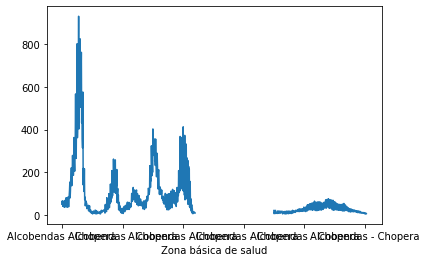

In [27]:
df.set_index('Zona básica de salud')['Casos confirmados en los ultimos 14 días'].plot()

Con la función `.plot(title="títulográfica")` titulamos el gráfico y los que realicemos a continuación.

<AxesSubplot:title={'center':'Casos de Covid-19 confirmados en los últimos 14 días'}, xlabel='Zona básica de salud'>

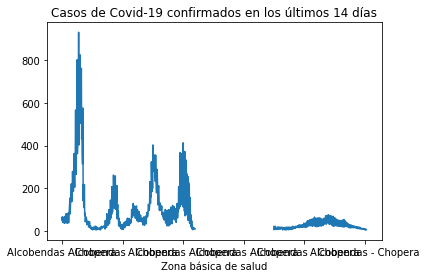

In [28]:
df.set_index('Zona básica de salud')['Casos confirmados en los ultimos 14 días'].plot(title="Casos de Covid-19 confirmados en los últimos 14 días")

In [107]:
df.set_index('Zona básica de salud')['Casos confirmados totales']

Zona básica de salud
Alcobendas - Chopera      7715.0
La Moraleja               5911.0
Marqués de la Valdavia    4181.0
Miraflores                5940.0
Valdelasfuentes           5948.0
                           ...  
Alcobendas - Chopera         NaN
La Moraleja                  NaN
Marqués de la Valdavia       NaN
Miraflores                   NaN
Valdelasfuentes              NaN
Name: Casos confirmados totales, Length: 1090, dtype: float64

<AxesSubplot:title={'center':'Casos confirmados totales'}, xlabel='Zona básica de salud'>

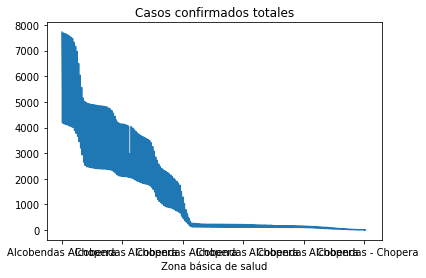

In [122]:
df.set_index('Zona básica de salud')['Casos confirmados totales'].plot(title="Casos confirmados totales")

Realizamos la misma operación con la tasa de incidencia. Primero de los últimos 14 días (hasta la fecha de publicación del informe) y luego total desde el inicio de la pandemia.

In [31]:
df.set_index('Zona básica de salud')['Tasa de incidencia acumulada en los últimos 14 días']

Zona básica de salud
Alcobendas - Chopera      177.59
La Moraleja               275.59
Marqués de la Valdavia    309.53
Miraflores                185.49
Valdelasfuentes           245.84
                           ...  
Alcobendas - Chopera        0.00
La Moraleja                 0.00
Marqués de la Valdavia      0.00
Miraflores                  0.00
Valdelasfuentes             0.00
Name: Tasa de incidencia acumulada en los últimos 14 días, Length: 1090, dtype: float64

<AxesSubplot:title={'center':'Tasa de incidencia acumulada en los últimos 14 días'}, xlabel='Zona básica de salud'>

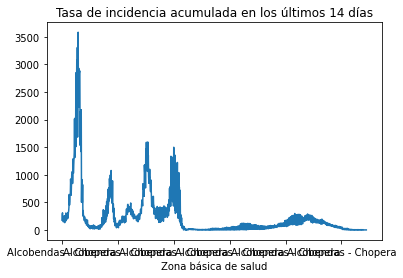

In [32]:
df.set_index('Zona básica de salud')['Tasa de incidencia acumulada en los últimos 14 días'].plot(title="Tasa de incidencia acumulada en los últimos 14 días")

In [33]:
df.set_index('Zona básica de salud')['Tasa de incidencia acumulada total']

Zona básica de salud
Alcobendas - Chopera      27401.88
La Moraleja               24681.62
Marqués de la Valdavia    23529.74
Miraflores                26872.96
Valdelasfuentes           22496.22
                            ...   
Alcobendas - Chopera          0.00
La Moraleja                   0.00
Marqués de la Valdavia        0.00
Miraflores                    0.00
Valdelasfuentes               0.00
Name: Tasa de incidencia acumulada total, Length: 1090, dtype: float64

<AxesSubplot:title={'center':'Tasa total de incidencia acumulada'}, xlabel='Zona básica de salud'>

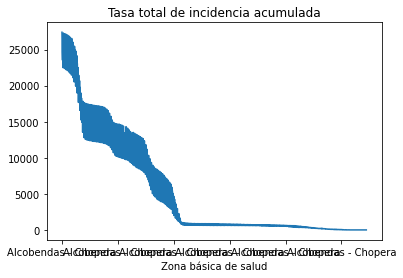

In [96]:
df.set_index('Zona básica de salud')['Tasa de incidencia acumulada total'].plot(title="Tasa total de incidencia acumulada")

In [36]:
df['fecha informe']

0       2022/03/29 11:51:00
1       2022/03/29 11:51:00
2       2022/03/29 11:51:00
3       2022/03/29 11:51:00
4       2022/03/29 11:51:00
               ...         
1085    2020/02/26 07:00:00
1086    2020/02/26 07:00:00
1087    2020/02/26 07:00:00
1088    2020/02/26 07:00:00
1089    2020/02/26 07:00:00
Name: fecha informe, Length: 1090, dtype: object

In [43]:
df.set_index('fecha informe')['Casos confirmados totales']

fecha informe
2022/03/29 11:51:00    7715.0
2022/03/29 11:51:00    5911.0
2022/03/29 11:51:00    4181.0
2022/03/29 11:51:00    5940.0
2022/03/29 11:51:00    5948.0
                        ...  
2020/02/26 07:00:00       NaN
2020/02/26 07:00:00       NaN
2020/02/26 07:00:00       NaN
2020/02/26 07:00:00       NaN
2020/02/26 07:00:00       NaN
Name: Casos confirmados totales, Length: 1090, dtype: float64

<AxesSubplot:xlabel='fecha informe'>

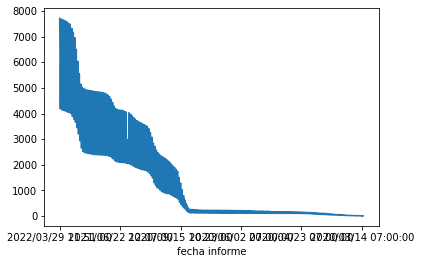

In [44]:
df.set_index('fecha informe')['Casos confirmados totales'].plot()

## Creación de gráficos

Para poder solventar el problema de las etiquetas y que el resultado sea mucho más limpio para construir una historia, podemos prescindir del dataframe e introducir, puesto que son pocos, manualmente en la sintaxis correspondiente los datos a representar. Para el caso puede ser interesante un gráfico de barras horizonal con los siguientes datos:

In [108]:
df.set_index('Zona básica de salud')['Casos confirmados totales']

Zona básica de salud
Alcobendas - Chopera      7715.0
La Moraleja               5911.0
Marqués de la Valdavia    4181.0
Miraflores                5940.0
Valdelasfuentes           5948.0
                           ...  
Alcobendas - Chopera         NaN
La Moraleja                  NaN
Marqués de la Valdavia       NaN
Miraflores                   NaN
Valdelasfuentes              NaN
Name: Casos confirmados totales, Length: 1090, dtype: float64

Para ello necesitamos importar la librería `matplotlib.pyplot`.

In [110]:
import matplotlib.pyplot as plt

Declaramos valores para el eje `x`, en este caso categorias.

In [117]:
eje_x = ['La Chopera', 'La Moraleja', 'Marqués de la Valdavia', 'Miraflores', 'Valdelasfuentes']

Definimos los valores para el eje `y`, es decir, los valores.

In [120]:
eje_y = [7.715,5.911,4.181,5.940,5.948]

Por último, creamos la gráfica y ponemos las barras del color que queramos, el naranja en este caso.

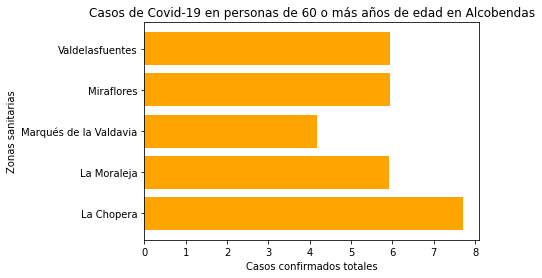

In [118]:
plt.barh(eje_x, eje_y, color="orange")
plt.ylabel('Zonas sanitarias')
plt.xlabel('Casos confirmados totales')
plt.title('Casos de Covid-19 en personas de 60 o más años de edad en Alcobendas')
plt.show()

Repetimos el proceso con los casos confirmados en los últimos 14 días.

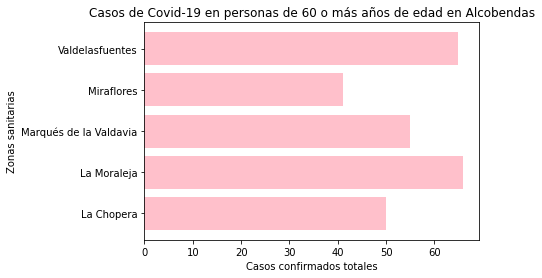

In [142]:
eje_x = ['La Chopera', 'La Moraleja', 'Marqués de la Valdavia', 'Miraflores', 'Valdelasfuentes']
eje_y = [50,66,55,41,65]
plt.barh(eje_x, eje_y, color="pink")
plt.ylabel('Zonas sanitarias')
plt.xlabel('Casos confirmados totales')
plt.title('Casos de Covid-19 en personas de 60 o más años de edad en Alcobendas')
plt.show()

Por último es interesante conocer los totales de estos gráficos. Para salvar el problema de recuento acumulado que supone una elevación multiplicada de los casos introducimos las cifras para que Python los sume. En primer lugar recontaremos los casos desde el inicio de la pandemia y en segundo lugar los relativos a los últimos 14 días. 

In [146]:
7.715+5.911+4.181+5.940+5.948

29.695

In [143]:
50+66+55+41+65

277

## Creación de mapas interactivos 

A continuación nos proponemmos representar geográficamente las 5 zonas sanitarias de Alcobendas para poder visualizarlas. Para ello necesitamos la librería `folium`, útil para la creación de mapas web interactivos con Python. Para ello repetimos el proceso anterior: instalación e importación de librería, definición de variables e introducción de funciones.
Empezamos preparando la librería folium con la sintaxis utilizada anteriormente para Pandas: `!pip install folium` y `import folium`.

In [51]:
!pip install folium

In [52]:
import folium 

Como en el proceso anterior con la librería Pandas, una vez preparada la librería necesitamos definir la variable con la que vamos a trabajar. Podría ser oportuno también crear la variable `url` para introducir en la librería Folium la base de datos que manejamos, pero en este caso no es necesario. Por lo que definimos la variable `geo` con las coordenadas del lugar a representar.

In [75]:
geo = [40.5475,-3.64209]

Una vez definida la variable es el momento de introducir funciones. La librería Folium cuenta con la función `.Map()`, para la representación de un mapa. Le decimos que la localización de las coordenadas a representar son las definidas en la variable `geo`, y esta sintaxis la asociamos a la variable `mapa` para establecer que cada vez que pongamos en este notebook dicha palabra, Python dibuje el mapa de Alcobendas.

In [56]:
mapa = folium.Map(location=geo)
mapa

Pero realmente este mapa es demasiado amplio para aportar información. Necesitamos bajar a las calles. Para ello es interesante el estilo de mapa *Stamen Toner*, que en blanco y negro nos muestra las calles de las coordenadas introducidas. Para ello necesitamos añadir a la sintaxis anterior `tiles='Stamen Toner', zoom_start=x`. Así nos permite mostrar el mapa con el zoom que determiemos. Para el caso he escogido 16.

In [57]:
folium.Map(
    location=[40.5475,-3.64209],
    tiles='Stamen Toner',
    zoom_start=16
)

Pero este mapa sigue sin enseñarnos un punto concreto. Nos interesa poder marcar puntos en él para reconocer las diferentes zonas sanitarias de Alcobendas. Para ello utilizamos la función de folium `.Marquer` que cuenta con el atributo `popup` que nos permirte ver el nombre de la calle al posicionarnos en un punto. Para ver mejor esto nos interesa otro estilo de mapa diferente al anterior, uno que no distinga las calles en el terreno, así que introducimos el tipo *Stamen Terrain* en la definición de `tiles`. `Folium.Marker`además nos permite elegir un texto para cada punto señalado al deslizar el cursor. Así, tras el comando `tooltip` ponemos el nombre de la zona sanitaria.

In [78]:
m = folium.Map(location=[40.5475,-3.64209],
    zoom_start=13,
    tiles='Stamen Terrain')

tooltip ='La Chopera'

folium.Marker([	40.5358796 , -3.7016036], popup='La Chopera', tooltip=tooltip).add_to(m)

tooltip = 'La Moraleja'

folium.Marker([40.531936 , -3.635167], popup='La Moraleja', tooltip=tooltip).add_to(m)

tooltip = 'Marqués de la Valdavia'

folium.Marker([40.541 , -3.6374], popup='Marqués de la Valdavia', tooltip=tooltip).add_to(m)

tooltip = 'Miraflores'

folium.Marker([40.5358796, -3.7016036], popup='Miraflores', tooltip=tooltip).add_to(m)

tooltip = 'Valdelasfuentes'

folium.Marker([40.547425 , -3.654149], popup='Valdelasfuentes', tooltip=tooltip).add_to(m)

m


El resultado es este. No entiendo por qué *La Chopera* no sale representada. Puede ser interesante de nuevo recuperar el estilo de mapa sobre las calles y que en la zona zanitaria aparezca también el número de contagios totales.

In [82]:
m = folium.Map(location=[40.5475,-3.64209],
    zoom_start=13,
              tiles='Stamen Toner')

tooltip ='La Chopera, 7.715'

folium.Marker([	40.5358796 , -3.7016036], popup='La Chopera', tooltip=tooltip).add_to(m)

tooltip = 'La Moraleja, 5.911'

folium.Marker([40.531936 , -3.635167], popup='La Moraleja', tooltip=tooltip).add_to(m)

tooltip = 'Marqués de la Valdavia, 4.181'

folium.Marker([40.541 , -3.6374], popup='Marqués de la Valdavia', tooltip=tooltip).add_to(m)

tooltip = 'Miraflores, 5.940'

folium.Marker([40.5358796, -3.7016036], popup='Miraflores', tooltip=tooltip).add_to(m)

tooltip = 'Valdelasfuentes, 5.948'

folium.Marker([40.547425 , -3.654149], popup='Valdelasfuentes', tooltip=tooltip).add_to(m)

m

Este estilo no me convence así que vuelvo al que genera folium por defecto, eliminando la sistaxis de `tiles`.

In [83]:
m = folium.Map(location=[40.5475,-3.64209],
    zoom_start=13,)

tooltip ='La Chopera, 7.715'

folium.Marker([	40.5358796 , -3.7016036], popup='La Chopera', tooltip=tooltip).add_to(m)

tooltip = 'La Moraleja, 5.911'

folium.Marker([40.531936 , -3.635167], popup='La Moraleja', tooltip=tooltip).add_to(m)

tooltip = 'Marqués de la Valdavia, 4.181'

folium.Marker([40.541 , -3.6374], popup='Marqués de la Valdavia', tooltip=tooltip).add_to(m)

tooltip = 'Miraflores, 5.940'

folium.Marker([40.5358796, -3.7016036], popup='Miraflores', tooltip=tooltip).add_to(m)

tooltip = 'Valdelasfuentes, 5.948'

folium.Marker([40.547425 , -3.654149], popup='Valdelasfuentes', tooltip=tooltip).add_to(m)

m

Para que los marcadores destaquen más interesa cambiarlos de color. Para ello introducimos al final de la sintaxis utilizada `icon=folium.Icon(color="elquequeramos")`. Voy a escoger morado ya que creo que es el que más va a resaltar. 

In [89]:
m = folium.Map(location=[40.5475,-3.64209],
    zoom_start=13,)

tooltip ='La Chopera, 7.715'

folium.Marker([	40.5358796 , -3.7016036], popup='La Chopera', tooltip=tooltip, icon=folium.Icon(color="purple")).add_to(m)

tooltip = 'La Moraleja, 5.911'

folium.Marker([40.531936 , -3.635167], popup='La Moraleja', tooltip=tooltip, icon=folium.Icon(color="purple")).add_to(m)

tooltip = 'Marqués de la Valdavia, 4.181'

folium.Marker([40.541 , -3.6374], popup='Marqués de la Valdavia', tooltip=tooltip, icon=folium.Icon(color="purple")).add_to(m)

tooltip = 'Miraflores, 5.940'

folium.Marker([40.5358796, -3.7016036], popup='Miraflores', tooltip=tooltip, icon=folium.Icon(color="purple")).add_to(m)

tooltip = 'Valdelasfuentes, 5.948'

folium.Marker([40.547425 , -3.654149], popup='Valdelasfuentes', tooltip=tooltip, icon=folium.Icon(color="purple")).add_to(m)

m

Por último, puede ser interesante cambiar el icono del marcador. Escojo una imagen del Covid-19 y creando una variable para el icono, introduzdo `icon=folium.Icon`en la sintaxis de esta manera:

In [93]:
m = folium.Map(location=[40.5475,-3.64209],
    zoom_start=13,)

icon_url = "https://www.who.int/images/default-source/health-topics/health-financing/novel-coronavirus-ru.jpg?sfvrsn=755458c4_12"

tooltip ='La Chopera, 7.715'
icon = folium.features.CustomIcon(icon_url,icon_size=(28, 30))
folium.Marker([	40.5358796 , -3.7016036], popup='La Chopera', tooltip=tooltip, icon=folium.Icon(color="purple")).add_to(m)

tooltip = 'La Moraleja, 5.911'
icon = folium.features.CustomIcon(icon_url,icon_size=(28, 30))
folium.Marker([40.531936 , -3.635167], popup='La Moraleja', tooltip=tooltip, icon=folium.Icon(color="purple")).add_to(m)

tooltip = 'Marqués de la Valdavia, 4.181'
icon = folium.features.CustomIcon(icon_url,icon_size=(28, 30))
folium.Marker([40.541 , -3.6374], popup='Marqués de la Valdavia', tooltip=tooltip, icon=folium.Icon(color="purple")).add_to(m)

tooltip = 'Miraflores, 5.940'
icon = folium.features.CustomIcon(icon_url,icon_size=(28, 30))
folium.Marker([40.5358796, -3.7016036], popup='Miraflores', tooltip=tooltip, icon=folium.Icon(color="purple")).add_to(m)

tooltip = 'Valdelasfuentes, 5.948'
icon = folium.features.CustomIcon(icon_url,icon_size=(28, 30))
folium.Marker([40.547425 , -3.654149], popup='Valdelasfuentes', tooltip=tooltip, icon=folium.Icon(color="purple")).add_to(m)

m

Tras haber comprendido, analizado y jugado con la visualización de los datos construimos una historia para poner en práctica la utilidad de las herramientas utilizadas.

**HISTORIA** (suponer que es 30 de marzo)

# Alcobendas registra cerca de 30.000 casos de coronavirus en personas mayores de 60 años desde el inicio de la pandemia

## La Chopera es la zona con más casos confirmados, 7.715 en dos años frente a los 4.181 de Marqués de la Valdavia, la zona menos golpeada del municipio en este segmento de la población

El municipio de Alcobendas cuenta **29.695** casos de Covid-19 en personas mayores de 60 años desde el 25 de marzo de 2020 hasta el pasado 29 de marzo. Dos años y cuatro días después del inicio de la pandemia **la tasa de incidencia ha bajado un 104%**, pero aún hay contagios. La Moraleja encabeza la lista con un total de 66 en los últimos 14 días, seguida solo con un caso menos por Valdelasfuentes. El tercer lugar lo ocupa Marqués de la Valdavia, con 55 nuevos contagios, seguido de La Chopera con 50 y de Miraflores con 41 casos confirmados en los últimos 14 días en personas mayores de 60 años.

<AxesSubplot:title={'center':'Tasa total de incidencia acumulada en personas mayores de 60 años en Alcobendas'}, xlabel='fecha informe'>

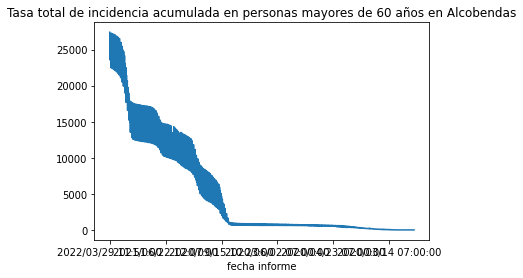

In [98]:
df.set_index('fecha informe')['Tasa de incidencia acumulada total'].plot(title="Tasa total de incidencia acumulada en personas mayores de 60 años en Alcobendas")

>La tasa de incidencia acumulada ha disminuido un **104%** desde el inicio  de la pandemia en Alcobendas en las personas mayores de 60 años 

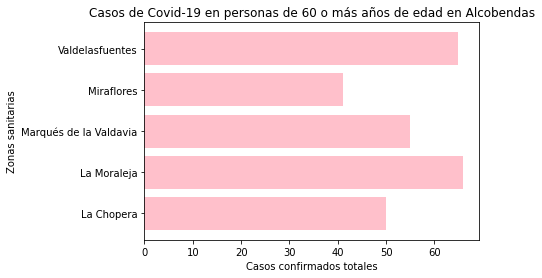

In [119]:
eje_x = ['La Chopera', 'La Moraleja', 'Marqués de la Valdavia', 'Miraflores', 'Valdelasfuentes']
eje_y = [50,66,55,41,65]
plt.barh(eje_x, eje_y, color="pink")
plt.ylabel('Zonas sanitarias')
plt.xlabel('Casos confirmados totales')
plt.title('Casos de Covid-19 en personas de 60 o más años de edad en Alcobendas')
plt.show()

> Con 66 nuevos casos La Moraleja es la zona sanitaria de Alcobendas que encabeza la lista de contagios en los últimos 14 días.

En total se han registrado **277 nuevos casos en los últimos 14 días**. Pero las cifras de los últimos dos años cambian el ránking. La Chopera es la zona sanitaria con más casos confirmados en este segmento de la población con un total de 7.715 en dos años, seguida de Valdelasfuentes con 5.948 contagios, a quien pisa los talones Miraflores, con 5.940 registros, sólo 8 menos. No muy lejos le sigue La Moraleja, con 5.911 casos confirmados seguida por, en quinto y último lugar, Marqués de la Valdavia con 4.181 personas de 60 años en adelante contagiadas en los últimos dos años. 

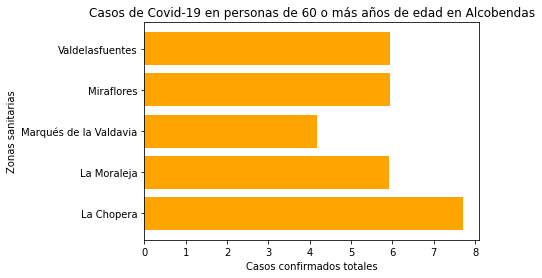

In [121]:
eje_x = ['La Chopera', 'La Moraleja', 'Marqués de la Valdavia', 'Miraflores', 'Valdelasfuentes']
eje_y = [7.715,5.911,4.181,5.940,5.948]
plt.barh(eje_x, eje_y, color="orange")
plt.ylabel('Zonas sanitarias')
plt.xlabel('Casos confirmados totales')
plt.title('Casos de Covid-19 en personas de 60 o más años de edad en Alcobendas')
plt.show()

A pesar de que los contagios no han desaparecido, son insuficientes para frenar la pendiente negativa de la curva, que dos años después de aquel alarmante marzo alcanza puntos por debajo de cero en Alcobendas para este segmento de la población.  

<AxesSubplot:title={'center':'Casos confirmados totales'}, xlabel='Zona básica de salud'>

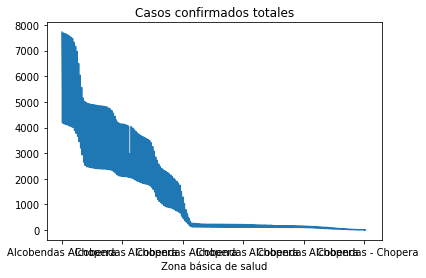

In [123]:
df.set_index('Zona básica de salud')['Casos confirmados totales'].plot(title="Casos confirmados totales")

>Disminuyen los contagios en los últimos 14 días pero aún no llegan a desaparecer.

<AxesSubplot:title={'center':'Casos de Covid-19 confirmados en los últimos 14 días'}, xlabel='Zona básica de salud'>

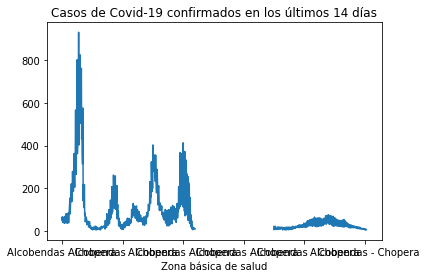

In [28]:
df.set_index('Zona básica de salud')['Casos confirmados en los ultimos 14 días'].plot(title="Casos de Covid-19 confirmados en los últimos 14 días")

In [124]:
m

El Ayuntamiento de Alcobendas continúa actualizando semanalmente los datos de la incidencia de casos Covid-19 en la población de 60 años en adelante de acuerdo a la implantación de la nueva **Estrategia de vigilancia y control frente a Covid-19** tras la fase aguda de la pandemia de la Comunidad de Madrid.